In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [106]:
# Function to simulate bandits and return rewards
def simulate_bandits(K, N):
    bandits = [np.random.normal(loc=np.random.randint(4, 6), scale=np.random.uniform(4.0, 5.5), size=N) for _ in range(K)]
    return bandits

In [124]:
def find_best_bandits(bandits):
    means = [np.mean(bandit) for bandit in bandits]
    best_bandit = np.argmax(means)
    means[best_bandit] = np.min(means)  # Set the best mean to the minimum to find the second best
    second_best_bandit = np.argmax(means)
    return best_bandit, second_best_bandit

def update_bandits(bandits, best_bandit, second_best_bandit):
    # bandits[best_bandit] += 2
    # bandits[second_best_bandit] += 1

    # Update standard deviation of the bandit with the best mean
    bandits[best_bandit] = np.random.normal(loc=np.random.randint(4, 6)+1, scale=np.random.uniform(4, 6), size=len(bandits[best_bandit]))

    # Update standard deviation of the bandit with the second-best mean
    bandits[second_best_bandit] = np.random.normal(loc=np.random.randint(4, 6)+2, scale=np.random.uniform(1, 2), size=len(bandits[second_best_bandit]))

    return bandits

In [125]:
# Function to perform the K-armed bandit simulation for different scenarios
def k_armed_bandit_simulation(N, K, scenario, bandits):
    # bandits = simulate_bandits(K, N)
    total_reward = 0
    rewards = np.zeros(N)
    chosen_levers = np.zeros(N)

    epsilon = 0.1
    exploration_decay = 0.99

    for t in range(N):
        if scenario == 'random':
            lever = np.random.randint(0, K)
        elif scenario == 'exploitation':
            if t == 0:
                lever = np.random.randint(0, K)
            else:
                lever = np.argmax(rewards[:t])
        elif scenario == 'epsilon_greedy':
            if np.random.rand() < epsilon:
                lever = np.random.randint(0, K)
            else:
                if t == 0:
                    lever = np.random.randint(0, K)
                else:
                    lever = np.argmax(rewards[:t])
        elif scenario == 'epsilon_decay':
            if np.random.rand() < epsilon:
                lever = np.random.randint(0, K)
            else:
                if t == 0:
                    lever = np.random.randint(0, K)
                else:
                    lever = np.argmax(rewards[:t])
            epsilon *= exploration_decay

        lever = min(lever, K - 1)
        reward = bandits[lever][t]
        total_reward += reward
        rewards[t] = total_reward / (t + 1)
        chosen_levers[t] = lever
    return rewards


In [126]:
def plot_results(N, all_rewards):
    for scenario, rewards in all_rewards.items():
        plt.plot(range(1, N + 1), rewards, label=scenario)
    plt.xlabel('Iterations (t)')
    plt.ylabel('Average Reward')
    plt.title('Exploration vs. Exploitation Dilemma')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


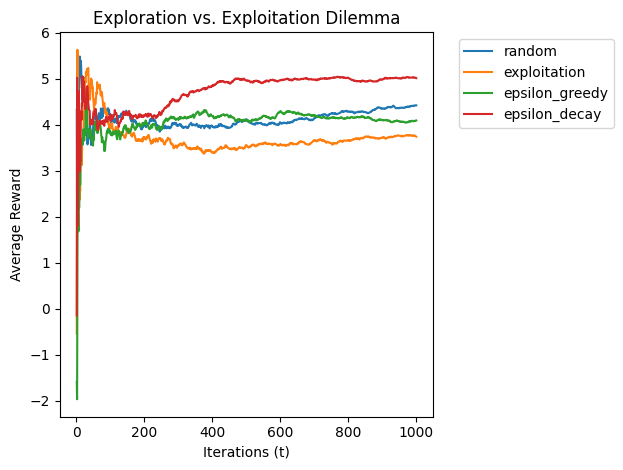

In [110]:
N = 1000
K = 10
scenarios = ['random', 'exploitation', 'epsilon_greedy', 'epsilon_decay']
all_rewards = {}
for scenario in scenarios:
    rewards = k_armed_bandit_simulation(N, K, scenario, simulate_bandits(K, N))
    all_rewards[scenario] = rewards


plot_results(N, all_rewards)


In [127]:
bandits = simulate_bandits(K, N)

best_bandit, second_best_bandit = find_best_bandits(bandits)
updated_bandits = update_bandits(bandits, best_bandit, second_best_bandit)

N = 1000
K = 10
scenarios = ['random', 'exploitation', 'epsilon_greedy', 'epsilon_decay']
all_rewards = {}
for scenario in scenarios:
    rewards = k_armed_bandit_simulation(N, K, scenario, update_bandits)
    all_rewards[scenario] = rewards

plot_results(N, all_rewards)

TypeError: 'function' object is not subscriptable

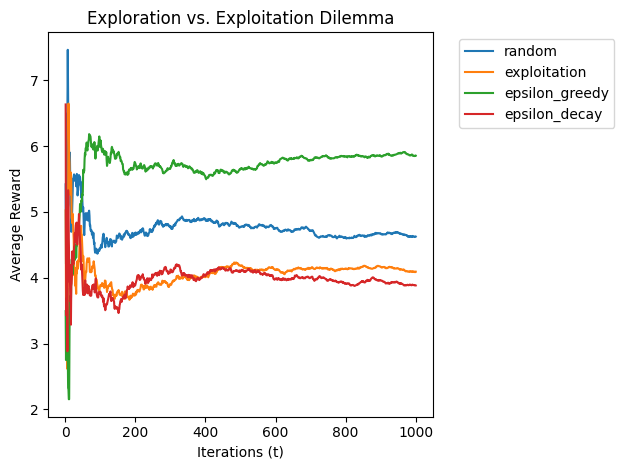

In [133]:
N = 1000
K = 10
scenarios = ['random', 'exploitation', 'epsilon_greedy', 'epsilon_decay']
all_rewards = {}

# Initialize bandits outside the loop
bandits = simulate_bandits(K, N)

for scenario in scenarios:
    # Pass the initialized bandits to the function
    rewards = k_armed_bandit_simulation(N, K, scenario, bandits)
    all_rewards[scenario] = rewards

plot_results(N, all_rewards)